# Exercise 1

In [74]:
import pandas as pd

data_df = pd.read_csv('./data/train.tsv', sep='\t')

print(data_df.head())


   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


In [75]:
data_df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

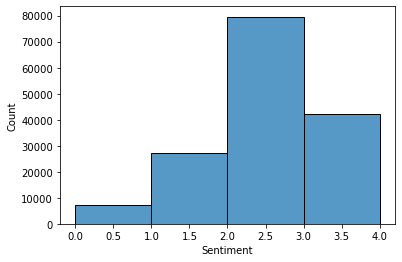

In [76]:
import seaborn as sns

sns.histplot(data=data_df, x='Sentiment', stat='count', bins=range(5))

In [77]:
# source for tokenizing, removing symbols, and removing numbers:
# https://blog.ekbana.com/pre-processing-text-in-python-ad13ea544dae

from string import punctuation
import nltk
#nltk.download('punkt')

def preprocess_text(text):
    output = ''.join(c for c in text if not c.isdigit())
    output = ''.join(c for c in output if c not in punctuation)
    word_tokens = nltk.word_tokenize(output)
    return str(word_tokens)

data_df['Phrase'] = data_df['Phrase'].apply(preprocess_text)

print(data_df.head())

   PhraseId  SentenceId                                             Phrase  \
0         1           1  ['A', 'series', 'of', 'escapades', 'demonstrat...   
1         2           1  ['A', 'series', 'of', 'escapades', 'demonstrat...   
2         3           1                                    ['A', 'series']   
3         4           1                                              ['A']   
4         5           1                                         ['series']   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X = data_df['Phrase'].values
y = data_df['Sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

score = accuracy_score(y_test, y_pred)

print(score)

0.6110256738861122


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf_vectorizer = TfidfVectorizer()

tfidf_X_train = tfidf_vectorizer.fit_transform(tfidf_X_train)
tfidf_X_test = tfidf_vectorizer.transform(tfidf_X_test)

tfidf_mnb = MultinomialNB()
tfidf_mnb.fit(tfidf_X_train,tfidf_y_train)
tfidf_y_pred = mnb.predict(tfidf_X_test)

tfidf_score = accuracy_score(tfidf_y_test, tfidf_y_pred)

print(tfidf_score)


0.5868682985176642


# Exercise 2

## Entities:

## Key phrases:

# Exercise 3

The answers are so different, but it's hard for me to identify the difference in philosophy.